# Importación de librerías

In [ ]:
# Importa las librerías a nuestro entorno de trabajo
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics
from sklearn import linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.ensemble import BalancedBaggingClassifier

from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

# Simplificado de base de datos y transformación del dataframe

Pasos a seguir:
1. Subir archivo.xlsx de forma local
2. Lectura del archivo.xlsx y creación de dataframe
3. Creación de nuevo dataframe simplificado que contenga columnas especificas del dataframe de origen
4. Conversión del nuevo dataframe simplificado a tipo csv
5. Descargar dataframe.csv simplificado 
6. Utilizar nuevo dataframe simplificado para futuras ejecuciones

Con esto estamos simplificando la base de datos utilizando solo las columnas que son necesarias según el enunciado, pasando de 574 columnas a solo 62. Además, se está disminuyendo el tiempo de carga del archivo al subirse de forma local, y el tiempo de lectura para crear el dataframe.


In [ ]:
#Subiendo archivo.xlsx de forma local
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Definiendo archivo
#archivo = 'Base_clientes_Monopoly.xlsx'
#Lectura de la base de datos y creación del data frame
#dataframe=pd.read_excel(archivo, sheet_name='Transición de Negocio')

In [ ]:
#Creación de nuevo dataframe simplificado con columnas especificas del enunciado

#df = dataframe[['Id', 'Region','Renta', 'Sexo', 'Subsegmento', 'Edad', 'Adicional', 'Antiguedad', 'CambioPin', 'Consumo', 'Debito', 'Ctacte', 'Cuentas', 'Hipotecario', 'Internauta',
#                'Monoproducto', 'TC', 'Dualidad', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2', 'Col_T12', 'ColL1TE_T12', 'EeccInt_T12', 'EeccNac_T12', 'Fac_T12', 'FacAI_T12', 'FacAN_T12', 
#                'FacCCOT_T12', 'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'FacCOL_T12', 'FacDebAtm_T12', 'FacDebCom_T12', 'FacPAT_T12', 'FlgAct_T12', 'FlgActAI_T12', 'FlgActAN_T12', 
#                'FlgActCCOT_T12', 'FlgActCCPC_T12', 'FlgActCI_T12', 'FlgActCN_T12', 'FlgActCOL_T12', 'FlgActPAT_T12', 'PagoInt_T12', 'PagoNac_T12', 'Txs_T12', 'TxsAI_T12', 'TxsAN_T12',
#                'TxsCCOT_T12', 'TxsCCPC_T12', 'TxsCI_T12', 'TxsCN_T12', 'TxsCOL_T12', 'TxsDebAtm_T12', 'TxsDebCom_T12', 'TxsPAT_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'target']].copy()

#Transformación de dataframe a tipo csv y guardado del mismo en la memoria para posteriormente ser descargado

#df.to_csv('Base_clientes_Monopoly(Simplified).csv', index=False, encoding='utf-8')

#Creación del nuevo dataframe con archivo.csv simplificado


In [ ]:
# Subiendo nuevo archivo de forma local
from google.colab import files
uploaded = files.upload()
#Creación del dataframe
df = pd.read_csv('Base_clientes_Monopoly(Simplified).csv', sep=',')

Saving Base_clientes_Monopoly(Simplified).csv to Base_clientes_Monopoly(Simplified).csv


# Análisis Exploratorio

In [ ]:
#Mostramos los primeros 5 registros
df.head(5)

,Id,Region,Renta,Sexo,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,...,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,1,13.0,NaN,M,160,43,1,130,NaN,0,...,0.0,3.0,0.0,6.0,30.0,0.0,731768.0,25890.0,0.0,0
1,2,13.0,143640.0,H,160,46,0,69,NaN,0,...,0.0,1.0,0.0,0.0,0.0,0.0,244876.0,284632.0,0.0,0
2,3,13.0,929106.0,H,170,45,1,24,1.0,0,...,0.0,3.0,0.0,16.0,5.0,0.0,94415.0,0.0,0.0,0
3,4,13.0,172447.0,H,151,46,1,134,1.0,0,...,0.0,3.0,0.0,0.0,0.0,0.0,358807.0,14660.0,0.0,0
4,5,13.0,805250.0,H,170,46,1,116,1.0,0,...,0.0,6.0,0.0,0.0,0.0,0.0,67516.0,234211.0,0.0,0


In [ ]:
# Mostramos los ultimos registros
df.tail(5)

,Id,Region,Renta,Sexo,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,...,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
51119,51120,13.0,364978.0,H,160,51,1,57,1.0,0,...,0.0,9.0,0.0,16.0,0.0,0.0,549787.0,34237.0,0.0,0
51120,51121,13.0,625376.0,H,170,51,0,39,1.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
51121,51122,13.0,806220.0,H,160,47,1,153,1.0,0,...,0.0,3.0,0.0,1.0,0.0,0.0,103545.0,18000.0,0.0,0
51122,51123,13.0,NaN,M,160,47,0,11,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
51123,51124,13.0,840878.0,H,170,51,1,75,1.0,0,...,0.0,2.0,0.0,12.0,18.0,0.0,73300.0,0.0,0.0,0


In [ ]:
#Cantidad de filas y columnas
df.shape

(51124, 62)

In [ ]:
#Mostramos el nombre de las columnas
df.columns

Index(['Id', 'Region', 'Renta', 'Sexo', 'Subsegmento', 'Edad', 'Adicional',
       'Antiguedad', 'CambioPin', 'Consumo', 'Debito', 'Ctacte', 'Cuentas',
       'Hipotecario', 'Internauta', 'Monoproducto', 'TC', 'Dualidad',
       'CUPO_L1', 'CUPO_MX', 'CUPO_L2', 'Col_T12', 'ColL1TE_T12',
       'EeccInt_T12', 'EeccNac_T12', 'Fac_T12', 'FacAI_T12', 'FacAN_T12',
       'FacCCOT_T12', 'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'FacCOL_T12',
       'FacDebAtm_T12', 'FacDebCom_T12', 'FacPAT_T12', 'FlgAct_T12',
       'FlgActAI_T12', 'FlgActAN_T12', 'FlgActCCOT_T12', 'FlgActCCPC_T12',
       'FlgActCI_T12', 'FlgActCN_T12', 'FlgActCOL_T12', 'FlgActPAT_T12',
       'PagoInt_T12', 'PagoNac_T12', 'Txs_T12', 'TxsAI_T12', 'TxsAN_T12',
       'TxsCCOT_T12', 'TxsCCPC_T12', 'TxsCI_T12', 'TxsCN_T12', 'TxsCOL_T12',
       'TxsDebAtm_T12', 'TxsDebCom_T12', 'TxsPAT_T12', 'UsoL1_T12',
       'UsoL2_T12', 'UsoLI_T12', 'target'],
      dtype='object')

In [ ]:
#Información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              51124 non-null  int64  
 1   Region          51071 non-null  float64
 2   Renta           37759 non-null  float64
 3   Sexo            51123 non-null  object 
 4   Subsegmento     51124 non-null  int64  
 5   Edad            51124 non-null  int64  
 6   Adicional       51124 non-null  int64  
 7   Antiguedad      51124 non-null  int64  
 8   CambioPin       31736 non-null  float64
 9   Consumo         51124 non-null  int64  
 10  Debito          51124 non-null  int64  
 11  Ctacte          51124 non-null  int64  
 12  Cuentas         51124 non-null  int64  
 13  Hipotecario     51124 non-null  int64  
 14  Internauta      51124 non-null  int64  
 15  Monoproducto    51124 non-null  int64  
 16  TC              51124 non-null  int64  
 17  Dualidad        51124 non-null 

In [ ]:
#Algunas estadísticas de nuestros datos
df.describe()

,Id,Region,Renta,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,Debito,...,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
count,51124.000000,51071.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,31736.0,51124.000000,51124.000000,...,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,4.287300e+04,4.287300e+04,42873.000000,51124.000000
mean,25562.500000,10.828220,6.630771e+05,182.024274,38.702879,0.256181,38.896154,1.0,0.000900,0.875284,...,0.096284,2.224477,0.003172,5.605789,4.306883,0.228815,1.671249e+05,1.320438e+05,8.093227,0.089977
std,14758.371918,3.392703,4.092795e+05,29.276596,13.302573,0.436527,35.672549,0.0,0.029983,0.330400,...,0.815828,3.573449,0.056233,7.938518,8.658284,0.712812,3.034343e+05,4.613774e+05,88.744907,0.286152
min,1.000000,1.000000,1.000000e+00,151.000000,9.000000,0.000000,6.000000,1.0,0.000000,0.000000,...,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-7.088177e+06,-1.500000e+01,-2940.000000,0.000000
25%,12781.750000,9.000000,4.199990e+05,160.000000,28.000000,0.000000,14.000000,1.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.990000e+03,0.000000e+00,0.000000,0.000000
50%,25562.500000,13.000000,5.670120e+05,170.000000,35.000000,0.000000,25.000000,1.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,5.504200e+04,1.419100e+04,0.000000,0.000000
75%,38343.250000,13.000000,8.149035e+05,210.000000,46.000000,1.000000,54.000000,1.0,0.000000,1.000000,...,0.000000,3.000000,0.000000,8.000000,5.000000,0.000000,1.978870e+05,7.896000e+04,0.000000,0.000000
max,51124.000000,13.000000,1.308933e+07,959.000000,104.000000,1.000000,324.000000,1.0,1.000000,1.000000,...,35.000000,56.000000,1.000000,174.000000,144.000000,12.000000,5.647564e+06,1.198188e+07,3778.750000,1.000000


In [ ]:
#Revisamos la cantidad de valores nulos
nulos = df.isnull().sum().sum()
print('La cantidad de valores nulos es:',nulos)

La cantidad de valores nulos es: 362847


In [ ]:
#Cantidad de clientes hombres y mujeres
# H = Hombre
# M = Mujer
df.Sexo.value_counts()

H    27410
M    23713
Name: Sexo, dtype: int64

In [ ]:
#Cantidad de clientes que pagó el monto total o el monto mínimo
# 0 = Paga monto total
# 1 = Paga el mínimo
df.target.value_counts()

0    46524
1     4600
Name: target, dtype: int64

In [ ]:
#Cantidad de clientes que pagaron el monto total o el monto mínimo agrupados por sexo
df.groupby(['Sexo']).target.value_counts()

Sexo  target
H     0         24805
      1          2605
M     0         21718
      1          1995
Name: target, dtype: int64

In [ ]:
#Cantidad de cuentas que tienen los clientes
df.Cuentas.value_counts()

1    31757
2    18031
3     1227
4      103
5        6
Name: Cuentas, dtype: int64

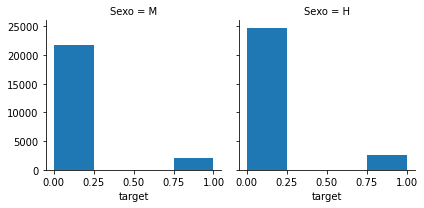

In [ ]:
#Grafico de cantidad de personas que pagaron el monto total o el monto mínimo agrupados por sexo
g = sb.FacetGrid(df, col='Sexo')
g =g.map(plt.hist, 'target', bins=4)

In [ ]:
#Correlación de los datos
df.corr()

,Id,Region,Renta,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,Debito,...,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
Id,1.000000,-0.013686,0.015980,0.054252,0.332918,0.050817,0.145347,NaN,0.007348,-0.121160,...,-0.002012,0.018182,-0.003196,-0.093604,-0.092658,0.054642,0.025340,-0.017038,0.002876,0.018496
Region,-0.013686,1.000000,-0.007266,-0.047450,0.010729,0.097302,0.046028,NaN,-0.001173,-0.030331,...,0.014558,0.012104,0.003362,0.025382,0.051423,0.052349,0.015588,0.027431,0.010178,-0.014621
Renta,0.015980,-0.007266,1.000000,0.010060,0.143001,0.035191,0.086308,NaN,0.031051,-0.041375,...,0.049568,-0.003140,0.002301,0.051048,0.069973,0.016503,0.100551,0.025713,0.067333,-0.013111
Subsegmento,0.054252,-0.047450,0.010060,1.000000,-0.519442,-0.159026,-0.271497,NaN,-0.006287,0.210611,...,0.016603,-0.044145,-0.009960,0.021888,-0.006501,-0.102596,-0.145672,-0.038117,-0.001108,-0.021646
Edad,0.332918,0.010729,0.143001,-0.519442,1.000000,0.235544,0.524487,NaN,0.005035,-0.363856,...,-0.012724,0.091166,0.000940,-0.105422,-0.069795,0.179457,0.197700,0.019151,0.008350,0.055389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxsPAT_T12,0.054642,0.052349,0.016503,-0.102596,0.179457,0.102711,0.181357,NaN,0.000655,-0.102504,...,-0.003632,0.000045,0.008660,0.001604,0.016019,1.000000,0.091815,0.021442,0.002174,0.045141
UsoL1_T12,0.025340,0.015588,0.100551,-0.145672,0.197700,0.127263,0.250658,NaN,0.011286,-0.127717,...,0.009273,0.143966,0.000291,-0.019171,-0.010898,0.091815,1.000000,0.060028,0.012223,0.059348
UsoL2_T12,-0.017038,0.027431,0.025713,-0.038117,0.019151,0.026070,0.019516,NaN,-0.003156,0.012932,...,-0.006001,0.024903,0.212559,0.012233,0.028019,0.021442,0.060028,1.000000,-0.002071,0.032629
UsoLI_T12,0.002876,0.010178,0.067333,-0.001108,0.008350,-0.001697,0.020463,NaN,0.028847,-0.016998,...,0.553598,-0.018861,-0.003150,0.006155,0.015785,0.002174,0.012223,-0.002071,1.000000,0.005924


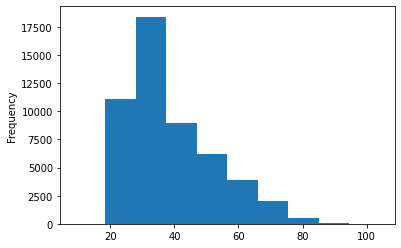

In [ ]:
#Histograma por Edad
df['Edad'].plot.hist();

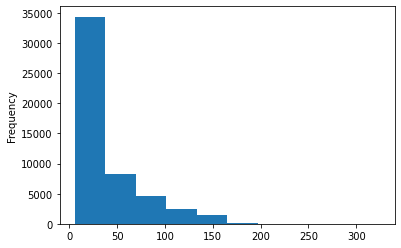

In [ ]:
#Histograma por Antiguedad (meses)
df['Antiguedad'].plot.hist();

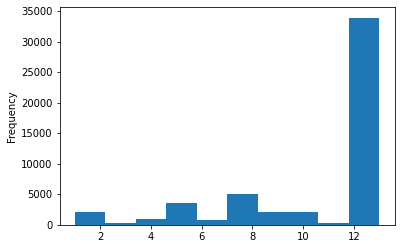

In [ ]:
#Histograma por Regiones
df['Region'].plot.hist();

> *Una vez visto los 3 ultimos histogramas, podemos darnos cuenta que la **mayor** cantidad de clientes se encuentra en una misma región(12) y rondan entre los 20 y los 80 años de edad aproximadamente. También se podría interpretar que los clientes que tienen alrededor de 30 años son mayoría y son muy pocos los que pasan los 50 meses de antiguedad.*

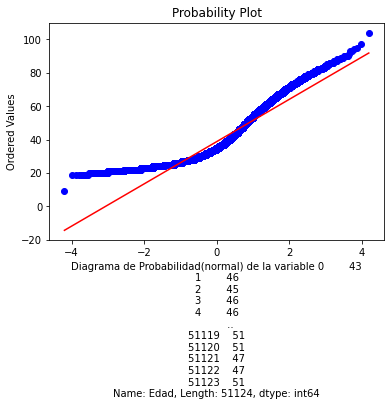

In [ ]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(df['Edad'], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

normalidad_variable_numerica(df['Edad'])

> En el gráfico anterior, la linea roja representa una linea de 45 grados, mientras mas se acerque la linea punteada azul (edad) a los 45 grados, mas normal será. Por lo tanto, podemos decir que la variable edad no posee una distribución normal.

In [ ]:
#Definimos renta y utilizamos head para ver los primeros 5 datos
X = df['Renta']
X.head()

0         NaN
1    143640.0
2    929106.0
3    172447.0
4    805250.0
Name: Renta, dtype: float64

In [ ]:
#Medidas de tendencia central de la Renta
print('La media es: {:0.1f}'.format(X.mean()))
print('La variancia es: {:0.2f}'.format(X.var()))
print('La desviación estandar es: {:0.2f}'.format(X.std()))
print('Coef. de variación es: {:0.2f}'.format(X.std()/X.mean()))

La media es: 663077.1
La variancia es: 167509676597.27
La desviación estandar es: 409279.46
Coef. de variación es: 0.62


> Con los resultados anteriores, podemos afirmar que en promedio la renta de los clientes es de 663.077 pesos y los datos tienen una dispersión alta. Si no hubiera ninguna variación en los datos, es decir, si fueran todos iguales, la desviación estándar sería cero. Por lo tanto, en este caso la variación de la renta de los clientes es alta. 

In [ ]:
#Test de normalidad
columnas_numericas = df.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(df[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna Id no sigue una distribución normal
Columna Subsegmento no sigue una distribución normal
Columna Edad no sigue una distribución normal
Columna Adicional no sigue una distribución normal
Columna Antiguedad no sigue una distribución normal
Columna Consumo no sigue una distribución normal
Columna Debito no sigue una distribución normal
Columna Ctacte no sigue una distribución normal
Columna Cuentas no sigue una distribución normal
Columna Hipotecario no sigue una distribución normal
Columna Internauta no sigue una distribución normal
Columna Monoproducto no sigue una distribución normal
Columna TC no sigue una distribución normal
Columna Dualidad no sigue una distribución normal
Columna CUPO_L1 no sigue una distribución normal
Columna CUPO_MX no sigue una distribución normal
Columna CUPO_L2 no sigue una distribución normal
Columna target no sigue una distribución normal


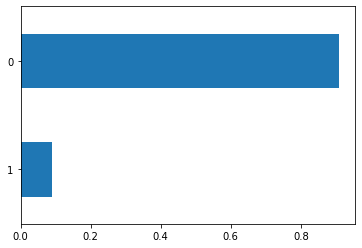

In [ ]:
#Distribución de variables categóricas
def distribucion_variable_categorica(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('target')

> Como se puede observar, mas del 90% de los clientes paga la totalidad del monto mientras que el resto paga el mínimo.

# Pre procesamiento de datos

Normalización y estandarización



In [ ]:
# Transformando variable Sexo a valores numéricos
# 0 = Mujer
# 1 = Hombre
df["Sexo"].replace({"M": "0", "H": "1"}, inplace=True)
# 0=R 
# 1=T
# 3=P
#Remplazando por valores numericos para el escalamiento de datos (se utiliza el df completo y no una columna especifica porque el dato se repetía en varias columnas y no afecta)
df.replace({"R": "0", "T": "1", "P": "2"}, inplace=True)

KNN e Imputación de datos

In [ ]:
# Creamos un objeto de KNN imputer. con 2 vecinos y parámetro weights = uniform.
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_imputado = imputer.fit_transform(df)

In [ ]:
#Asignación de datos imputados a un nuevo dataframe
df1=pd.DataFrame(df_imputado, columns=df.columns)

In [ ]:
#Revisión de datos nulos
nulos = df1.isnull().sum().sum()
print('La cantidad de valores nulos es:',nulos)

La cantidad de valores nulos es: 0


>Debido a la imputación de datos, se pudieron remplazar todos los valores nulos dejandolos en un total de 0.

Escalamiento de datos


In [ ]:
# Se crea primero el objeto Standard Scaler
scaler = StandardScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
scaler.fit(df1)

# Finalmente aplicamos el escalamiento
array_scaler = scaler.transform(df1)
array_scaler

array([[-1.73201693,  0.64041926, -0.35222646, ..., -0.22323253,
        -0.09500264, -0.31444189],
       [-1.73194917,  0.64041926, -1.21626985, ...,  0.35558298,
        -0.09500264, -0.31444189],
       [-1.73188141,  0.64041926,  0.74351861, ..., -0.28114942,
        -0.09500264, -0.31444189],
       ...,
       [ 1.73188141,  0.64041926,  0.43691009, ..., -0.24088275,
        -0.09500264, -0.31444189],
       [ 1.73194917,  0.64041926,  0.28432566, ..., -0.24924368,
        -0.09605721, -0.31444189],
       [ 1.73201693,  0.64041926,  0.52338404, ..., -0.28114942,
        -0.09500264, -0.31444189]])

In [ ]:
#Traspasando array a un dataframe
df_scaler = pd.DataFrame(array_scaler)
df_scaler

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-1.732017,0.640419,-0.352226,-1.07514,-0.752290,0.323032,1.703963,2.553917,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,0.063565,3.149059,-0.313228,2.025581,-0.223233,-0.095003,-0.314442
1,-1.731949,0.640419,-1.216270,0.93013,-0.752290,0.548555,-0.586867,0.843902,0.0,-0.03001,...,-0.124145,-0.351834,-0.054182,-0.726031,-0.509695,-0.313228,0.313314,0.355583,-0.095003,-0.314442
2,-1.731881,0.640419,0.743519,0.93013,-0.410717,0.473381,1.703963,-0.417584,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,1.379559,0.100097,-0.313228,-0.215816,-0.281149,-0.095003,-0.314442
3,-1.731814,0.640419,-1.144395,0.93013,-1.059706,0.548555,1.703963,2.666049,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,-0.726031,-0.509695,-0.313228,0.713979,-0.248354,-0.095003,-0.314442
4,-1.731746,0.640419,0.434490,0.93013,-0.410717,0.548555,1.703963,2.161455,0.0,-0.03001,...,-0.124145,1.111631,-0.054182,-0.726031,-0.509695,-0.313228,-0.310413,0.242789,-0.095003,-0.314442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,1.731746,0.640419,-0.664017,0.93013,-0.752290,0.924426,1.703963,0.507506,0.0,-0.03001,...,-0.124145,1.989710,-0.054182,1.379559,-0.509695,-0.313228,1.385604,-0.204560,-0.095003,-0.314442
51120,1.731814,0.640419,-0.014307,0.93013,-0.410717,0.924426,-0.586867,0.002911,0.0,-0.03001,...,-0.124145,-0.644527,-0.054182,-0.726031,-0.509695,1.182240,-0.547848,-0.281149,-0.095003,-0.314442
51121,1.731881,0.640419,0.436910,0.93013,-0.752290,0.623729,1.703963,3.198677,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,-0.594432,-0.509695,-0.313228,-0.183709,-0.240883,-0.095003,-0.314442
51122,1.731949,0.640419,0.284326,-1.07514,-0.752290,0.623729,-0.586867,-0.782014,0.0,-0.03001,...,-0.124145,-0.644527,-0.054182,-0.265433,-0.387737,-0.313228,-0.376066,-0.249244,-0.096057,-0.314442


In [ ]:
#Recuperamos nombres de las columnas
df_scaler.columns = df1.columns
df_scaler
#Comprobamos resultado
df_scaler.head()

,Id,Region,Renta,Sexo,Subsegmento,Edad,Adicional,Antiguedad,CambioPin,Consumo,...,TxsCI_T12,TxsCN_T12,TxsCOL_T12,TxsDebAtm_T12,TxsDebCom_T12,TxsPAT_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,-1.732017,0.640419,-0.352226,-1.07514,-0.752290,0.323032,1.703963,2.553917,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,0.063565,3.149059,-0.313228,2.025581,-0.223233,-0.095003,-0.314442
1,-1.731949,0.640419,-1.216270,0.93013,-0.752290,0.548555,-0.586867,0.843902,0.0,-0.03001,...,-0.124145,-0.351834,-0.054182,-0.726031,-0.509695,-0.313228,0.313314,0.355583,-0.095003,-0.314442
2,-1.731881,0.640419,0.743519,0.93013,-0.410717,0.473381,1.703963,-0.417584,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,1.379559,0.100097,-0.313228,-0.215816,-0.281149,-0.095003,-0.314442
3,-1.731814,0.640419,-1.144395,0.93013,-1.059706,0.548555,1.703963,2.666049,0.0,-0.03001,...,-0.124145,0.233552,-0.054182,-0.726031,-0.509695,-0.313228,0.713979,-0.248354,-0.095003,-0.314442
4,-1.731746,0.640419,0.434490,0.93013,-0.410717,0.548555,1.703963,2.161455,0.0,-0.03001,...,-0.124145,1.111631,-0.054182,-0.726031,-0.509695,-0.313228,-0.310413,0.242789,-0.095003,-0.314442


#Primer Modelo KNeighborsClassifier



In [ ]:
# Extraemos la variable que vamos a estimar.
Y= df1['target']
# Eliminamos variables que no entregan información importante.
X = df1.drop(columns=['Id','Subsegmento','target','CambioPin'])

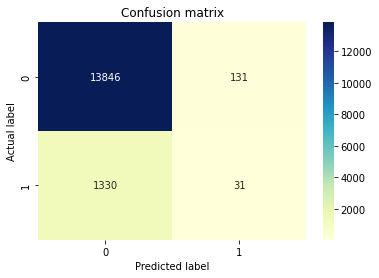

In [ ]:
# Dividimos los datos entre training y testing set donde el testing set obtendrá el 30% de los datos mientras que el de prueba obtendrá el 70.
# A la hora de ejecutar obtendremos el mismo conjunto de datos siempre, pero para obtener diferentes conjuntos de entrenamiento y de prueba se debe usar random_state=None
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# Creamos el objeto con el modelo a seguir
model = KNeighborsClassifier()
# Entrenamos el modelo de entrenamiento
model.fit(X_train, Y_train)
# Realizamos predicciones de los datos de prueba
y_pred = model.predict(X_test)
#Mostramos la matriz de confusión del set de prueba
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

* Verdaderos Positivos: 13.846
* Falsos Positivos: 131
* Verdaderos Negativos: 1330
* Falsos Negativos: 31

In [ ]:
#Visualizamos metricas del set de prueba
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     13977
         1.0       0.19      0.02      0.04      1361

    accuracy                           0.90     15338
   macro avg       0.55      0.51      0.50     15338
weighted avg       0.85      0.90      0.87     15338



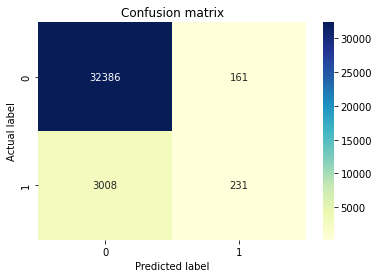

In [ ]:
# Realizamos predicciones de los datos de entrenamiento
Y_train_predicted = model.predict(X_train)
#Mostramos la matriz de confusión del set de entrenamiento
cnf_matrix = metrics.confusion_matrix(Y_train, Y_train_predicted)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

* Verdaderos Positivos: 32386
* Falsos Positivos: 161
* Verdaderos Negativos: 3008
* Falsos Negativos: 231

In [ ]:
#Visualizamos metricas del set de entrenamiento
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95     32547
         1.0       0.59      0.07      0.13      3239

    accuracy                           0.91     35786
   macro avg       0.75      0.53      0.54     35786
weighted avg       0.89      0.91      0.88     35786



Recordemos que target es la variable que queremos predecir, donde 0 paga el monto total y 1 paga el mínimo.
* Según los reportes del modelo, las metricas del set de entrenamiento mejoraron un poco en comparación al set de prueba. 
* Se puede apreciar que el modelo predijo mejor el target 0 con un porcentaje de predicciones positivas correctas casi perfecto, mientras que en el target 1 pasó todo lo contrario.
* Gracias al F1-Score, podemos concluir que el modelo hace un excelente trabajo prediciendo los clientes que pagarán el monto total, pero por otra parte es muy malo prediciendo los clientes que pagarán el minimo.



Área bajo la curva (ROC AUC)

In [ ]:
# AUC para el testing set
roc_auc_score(Y_test, y_pred)

0.5067024144893861

In [ ]:
# AUC para el training set
roc_auc_score(Y_train, Y_train_predicted)

0.5331858078221465

Según el área bajo la curva, el rendimiento del modelo es malo y por azar el 50% aprox de las predicciones serían acertadas.
* [0.5]: Es como lanzar una moneda.

* [0.5, 0.6): Test malo.

* [0.6, 0.75): Test regular.

* [0.75, 0.9): Test bueno.

* [0.9, 0.97): Test muy bueno.

* [0.97, 1): Test excelente.

#Segundo Modelo DecisionTreeClassifier

In [ ]:
# Separación en datos
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=Y)

In [ ]:
#Creación del modelo - Arbol de decisión
modelo = DecisionTreeClassifier(random_state=29)
# Entrenamiento del modelo
modelo.fit(x_train, y_train)
# Predicciones con testing set
y_pred = modelo.predict(x_test)
# Realizamos predicciones de los datos de entrenamiento
Y_pred = model.predict(x_train)

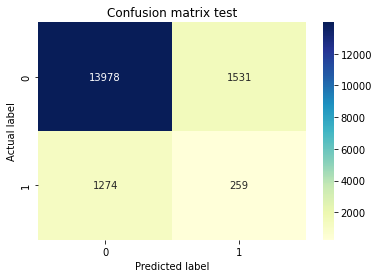

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     15509
         1.0       0.14      0.17      0.16      1533

    accuracy                           0.84     17042
   macro avg       0.53      0.54      0.53     17042
weighted avg       0.85      0.84      0.84     17042



In [ ]:
#Matriz de Confusión de testing set
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Visualizamos metricas del set de prueba
print(classification_report(y_test, y_pred))

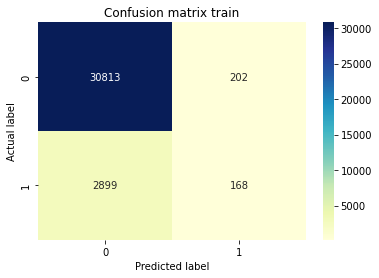

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     31015
         1.0       0.45      0.05      0.10      3067

    accuracy                           0.91     34082
   macro avg       0.68      0.52      0.52     34082
weighted avg       0.87      0.91      0.88     34082



In [ ]:
#Matriz de Confusión de training set
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, Y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Visualizamos metricas del set de entrenamiento
print(classification_report(y_train, Y_pred))

In [ ]:
# AUC para el testing set
roc_auc_score(y_test, y_pred)

0.5351164488081894

In [ ]:
# AUC para el training set
roc_auc_score(y_train, Y_pred)

0.5241318385599781

Según el área bajo la curva, el rendimiento del modelo es malo y por azar el 50% aprox de las predicciones serían acertadas.
* [0.5]: Es como lanzar una moneda.

* [0.5, 0.6): Test malo.

* [0.6, 0.75): Test regular.

* [0.75, 0.9): Test bueno.

* [0.9, 0.97): Test muy bueno.

* [0.97, 1): Test excelente.

#Tercer Modelo RandomForestClassifier

In [ ]:
# Modelo con Bosque de Arboles
modelo3 = RandomForestClassifier(n_estimators=300, class_weight="balanced",
                               max_features = 'sqrt', verbose=1, max_depth=15,
                               oob_score=True, random_state=50)
# Entrenamiento de datos
modelo3.fit(x_train, y_train)
# Predicción con testing set
y_pred_rf = modelo3.predict(x_test)
# Predicción con training set
Y_pred_rf = modelo3.predict(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.3s finished


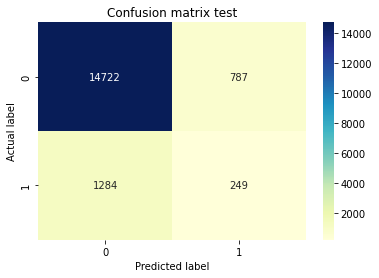

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     15509
         1.0       0.24      0.16      0.19      1533

    accuracy                           0.88     17042
   macro avg       0.58      0.56      0.56     17042
weighted avg       0.86      0.88      0.87     17042



In [ ]:
#Matriz de Confusión de testing set
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Reporte de métricas testing set
print(classification_report(y_test,y_pred_rf))

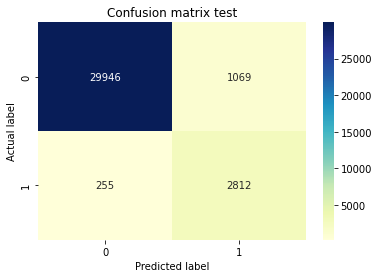

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     31015
         1.0       0.72      0.92      0.81      3067

    accuracy                           0.96     34082
   macro avg       0.86      0.94      0.89     34082
weighted avg       0.97      0.96      0.96     34082



In [ ]:
#Matriz de Confusión de training set
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, Y_pred_rf)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Reporte de métricas de training set
print(classification_report(y_train,Y_pred_rf))

In [ ]:
# AUC para el testing set
roc_auc_score(y_test, y_pred_rf)

0.5558409428071498

In [ ]:
# AUC para el training set
roc_auc_score(y_train, Y_pred_rf)

0.9411948350454236

Según el área bajo la curva, el rendimiento del modelo es muy bueno y mas del 98% de las predicciones serían acertadas.
* [0.5]: Es como lanzar una moneda.

* [0.5, 0.6): Test malo.

* [0.6, 0.75): Test regular.

* [0.75, 0.9): Test bueno.

* [0.9, 0.97): Test muy bueno.

* [0.97, 1): Test excelente.

#Cuarto Modelo LogisticRegression

In [ ]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo
model = run_model(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


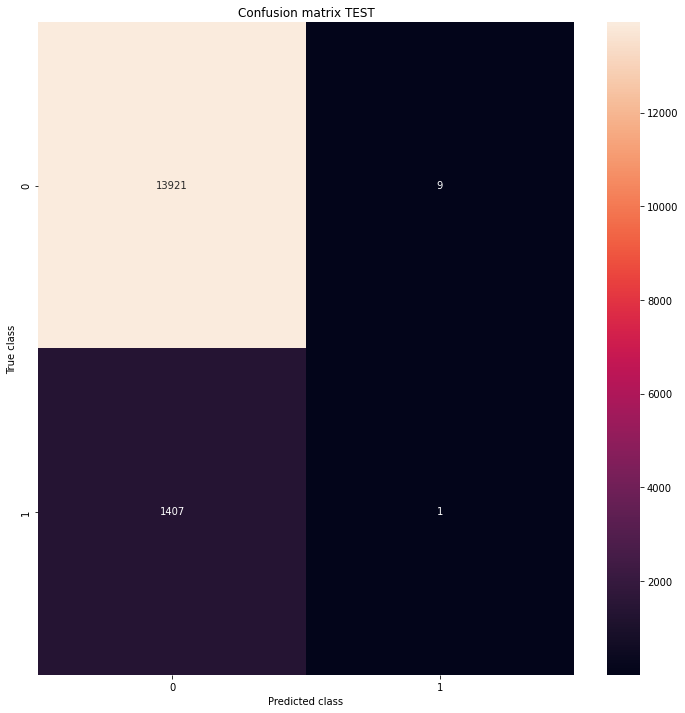

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     13930
         1.0       0.10      0.00      0.00      1408

    accuracy                           0.91     15338
   macro avg       0.50      0.50      0.48     15338
weighted avg       0.83      0.91      0.86     15338



In [ ]:
LABELS= ['0','1']
#definimos funcion para mostrar los resultados de test
def mostrar_resultados_test(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix TEST")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

def mostrar_resultados_train(y_train, pred_Y):
    conf_matrix = confusion_matrix(y_train, pred_Y)
    plt.figure(figsize=(12, 12))
    sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix TRAIN")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
 
pred_y = model.predict(X_test)
mostrar_resultados_test(y_test, pred_y)
print (classification_report(y_test, pred_y))

Estrategia de Penalización para compensar desbalance

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarn

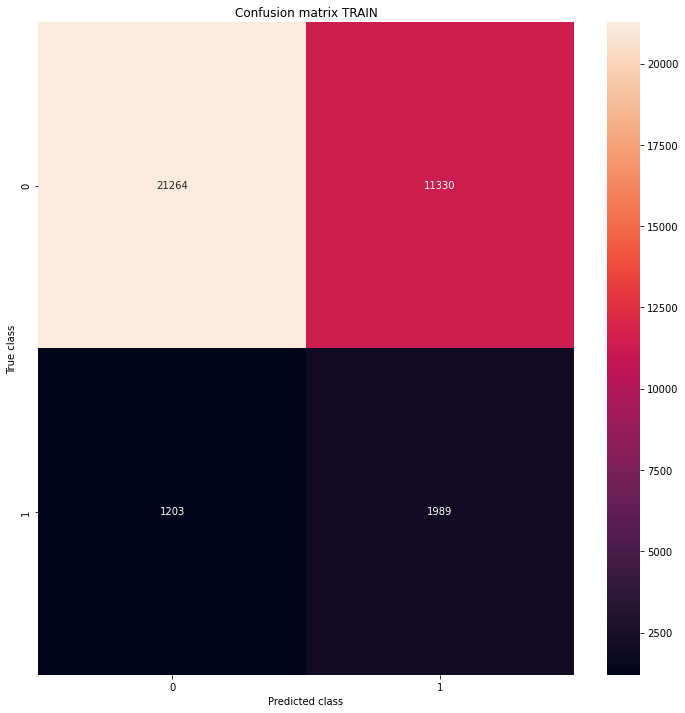

              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77     32594
         1.0       0.15      0.62      0.24      3192

    accuracy                           0.65     35786
   macro avg       0.55      0.64      0.51     35786
weighted avg       0.88      0.65      0.72     35786



In [ ]:
# Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos weight = “balanced” y con esto el algoritmo se encargará de equilibrar
# a la clase minoritaria durante el entrenamiento.
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_Y = model.predict(X_train)
mostrar_resultados_train(y_train, pred_Y)
print (classification_report(y_train, pred_Y))

#Quinto Modelo Smote-Tomek

Distribution before resampling Counter({0.0: 32594, 1.0: 3192})
Distribution after resampling Counter({0.0: 32205, 1.0: 15908})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


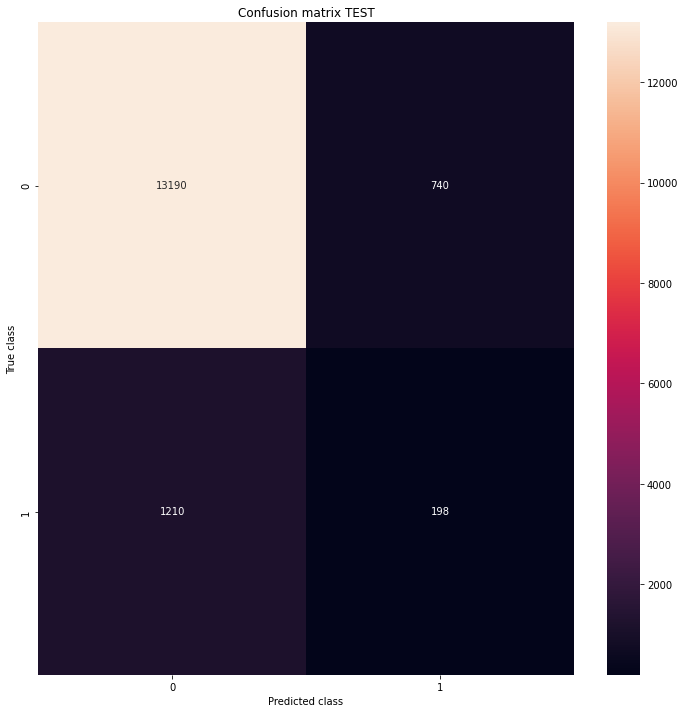

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     13930
         1.0       0.21      0.14      0.17      1408

    accuracy                           0.87     15338
   macro avg       0.56      0.54      0.55     15338
weighted avg       0.85      0.87      0.86     15338



In [ ]:
# En este caso usaremos SMOTE para oversampling: busca puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. 
# Y usaremos Tomek para undersampling que quita los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de nuestras clases).
os_us = SMOTETomek(sampling_strategy=0.5)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
#Predicciones con set de prueba
pred_y = model.predict(X_test)
#Predicciones con set de entrenamiento
pred_Y = model.predict(X_train_res)
#Mostrar matriz set de prueba
mostrar_resultados_test(y_test, pred_y)
#Mostramos las metricas del testing set
print(classification_report(y_test, pred_y))

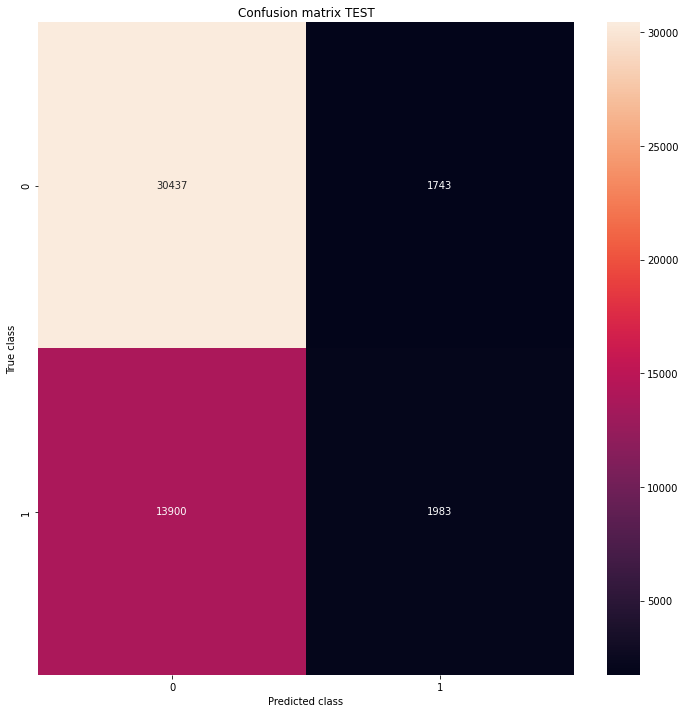

              precision    recall  f1-score   support

         0.0       0.69      0.95      0.80     32180
         1.0       0.53      0.12      0.20     15883

    accuracy                           0.67     48063
   macro avg       0.61      0.54      0.50     48063
weighted avg       0.64      0.67      0.60     48063



In [ ]:
#Mostrar matriz set de prueba
mostrar_resultados_test(y_train_res, pred_Y)
#Mostramos las metricas del training set
print(classification_report(y_train_res, pred_Y))

In [ ]:
# AUC para el testing set
roc_auc_score(y_test, pred_y)

0.5353246039450499

In [ ]:
# AUC para el training set
roc_auc_score(y_train_res, pred_Y)

0.5353431959942316

# Conclusión
* El mejor modelo de los realizados anteriormente es el tercero, el cual 
incluye un RandomForestClassifier con 300 arboles y una profunidad máxima de 15.
* Este modelo arrasó al resto, los cuales en general no tenían certeza en sus predicciones hablando de la segunda clase, mientras que en el tercero según el área bajo la curva es un muy buen modelo con u 94,1% de certeza en sus predicciones.
* Nos podemos dar cuenta que este tercer modelo puede mejorar aún mas aumentando la profunidad de los arboles, el problema es que el overfitting es evidente al ver que el accuracy es casi de 1. También pudimos notar que la diferencia entre los reportes de métricas del set de datos de prueba y entrenamiento no es tanta si nos fijamos en los accuracy, por esta parte se podría descartar el overfitting, pero por otra tenemos el gran cambio en la predicción del target 0, donde el f1-score aumentó notablemente mejorando todo el modelo.
* Tratemos de no engañarnos a nosotros mismos aumentando la profunidad de los arboles, ya que, al hacer esto el modelo deja de aprender y empieza a memorizar quitandole toda fiabilidad a la predicción. 
* Probablemente el tercer modelo no sea el mejor simplemente por el desbalance de datos que hay entre los target, pero los modelos que tenian los datos balanceados, aún asi no lograron demostrar ser buenos modelos.
